# PUI2017 HW6
### written by ChunChieh Tsai(cct367)
-----

# Contents

---------

## 0. Import Module
## 1. Download & Store Data
## 2. Read Data & First Exploration
## 3. Data Cleaning & Merging 
## 4. Data Visulization
## 5. Data Analysis & Model Testing
---------

# 0. Import module
### Purpose : make sure I can use other modules

In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import seaborn as sns

#s = json.load( open(os.getenv('PUI2016')+'/fbb_matplotlibrc.json') )
#pl.rcParams.update(s)
if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


I am using geopanda. that is **not required** for this particular exercise, but geopanda works with geospacial data: the shape files that we get from pluto for example.

PLEASE REMEMBER: seed your random functions if you need to use any, label your axes clearly, comment your code, use PEP8!


** An interesting urban question is "can we measure and predict energy use based on observables that are easier to be acquired". For example the urban observatory at CUSP can monitor lights: they are a relatively easy observable. All you need is a camera, and a pipeline to process your data. But how does the light coming from a window relate to the total energy consumption? We generally postulate that light is a proxy for occupancy, and that occupancy is a good predictor of energy consumption.**

** So let's test if the last link holds. If we have data on the energy consumed by a __building__ how well does that relate to the number of units in the building?**

** Data on energy consumption can be found here for the city of NY https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z  **

** Either obtain the data through the API or download the csv file, and move it to $PUIDATA**

** However this datasets does not have the number of units. We can find that in the [Pluto dataset](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page).**

** Reading in the Pluto data for manhattan, which will give me the number of units ber building   Manhattan/MNMapPLUTO.shp **

# 1. Download & Store Data
## Purpose: download the data from data source and make it reproducable
pridict the energy by matrix of buildings
can download from PLUTO csv
Read Energy File

In [2]:
os.system("curl -O https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv")
os.system("mv " + "rows.csv " + os.getenv("PUIDATA"))
os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v2.zip")
os.system("mv " + "mn_mappluto_16v2.zip " + os.getenv("PUIDATA") )
os.system("unzip -o "+ os.getenv("PUIDATA") + "/mn_mappluto_16v2.zip "+"-d "+ os.getenv("PUIDATA") + "/Manhattan")

0

# 2. Read Data & First Exploration
### Purpose: look how data look like
```
# 1. Geo Pandas read csv
    gp.GeoDataFrame.from_csv(your path)
# 2. Import scatter_matrix which help us visulize the data
    from pandas.tools.plotting import scatter_matrix
# 3. Plot the matrix
    scatter_matrix (nrg, s=300, figsize=(10, 10), diagonal='kde')
# 4. Read the ".shp" file 
    gp.GeoDataFrame.from_file(file path)
```

## 2.1 Read the Data

__Read by Geo Pandas__

In [3]:
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + "/rows.csv")
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")

__Read by Pandas__

NOTE : it will be faster than Geo Pandas

In [81]:
nrg_df = pd.read_csv(os.getenv("PUIDATA") + "/rows.csv")

## 2.2 First explore data
__note__
```
Python2:
from pandas.tool.plotting import scatter_matrix
Python3:
from pandas.plotting import scatter_matrix
```

In [78]:
# exploring the data a bit
#from pandas.plotting import scatter_matrix
#sfig = scatter_matrix(nrg, s=300, figsize=(10, 10), diagonal='kde')
####J looking for the relation between data

__Understand what columns we have__

In [6]:
nrg.columns

Index(['BBL', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Postcode',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'],
      dtype='object')

In [7]:
bsize.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoord'

As we discussed, coming up with a sensible model generally requires domain expertise. However, if the data you are investigating shows "obvious patterns", for example if two of the variable look like a line when plotted one against the other, then those patterns (correlations) may help you finding reasonable models for the data.

Explore your data, starting with a scatter matrix. 
A scatter matrix is a plot of all variables in your data against all other variables: 
each pair of variables is a subplot in the plot matrix. The diagonal line then would be a plot of a variable against itself, which is useless, so it is usually substituted by a histogram of that variable (or sometimes a KDE, which is basically a smooth histogram).

## 2.3 Second Exploratory Analysis
### Purpose: Focus on the data I want analyze
__Compare__

In [8]:
nrg.head(3)

,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__See numeric columns__


Reference: <a href="https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas">How do I find numeric columns in Pandas?</a>


In [9]:
#nrg._get_numeric_data().head(3)

In [4]:
nrg_num = nrg[["BBL","Postcode","DOF Property Floor Area (Buildngs and Parking)(ft2)","DOF Number of Buildings"]]

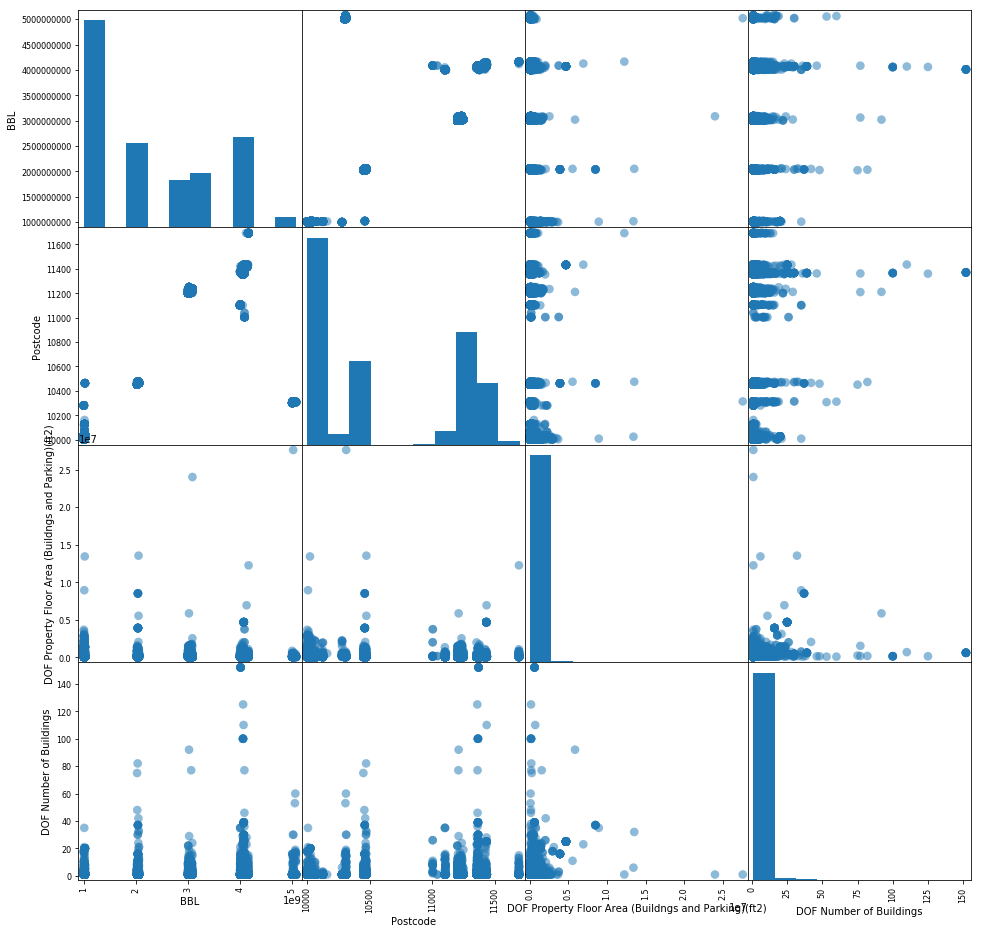

In [5]:
#try make a scatter plot of nrg. Few columns will plot - only those that have numerical values. 
#Pandas will ignore the other ones
from pandas.plotting import scatter_matrix
scatter_matrix (nrg_num, s=300, figsize=(16, 16));

Figure 1: scatter matrix of all numerical values in the files. ... comments on what you see

This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: I need to remove all values that cannot convert to float in order to use the columns and convert them to float arrays and do math with them.

You can use pd.to_numeric() which is a function that transforms values to float (when possible). The default behavior of this function is to throw an error if it encounters a value that it cannot convert. That behavior can be modified with the "error" keyword, buy setting it to "coerce". Please look at the function documentation to understand the syntax.

In [6]:
nrg['Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg['Site EUI(kBtu/ft2)'],errors="coerce")
#nrg['Site EUI(kBtu/ft2)'].dropna()

In [7]:
# use pd.to_numeric to convert strings to numeric values, 
##check that your conversion worked: e.g.
print (nrg['Site EUI(kBtu/ft2)'].astype(float))
#[...] do this for all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
bsize.BBL.astype(float)

#this should not return an error
#notice I can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!


Record Number
12086      NaN
14354      NaN
12150      NaN
12590      NaN
15591      NaN
12135      NaN
8523       NaN
15920      NaN
14241      NaN
15925      NaN
9685       NaN
7540       NaN
14360      NaN
10588      NaN
14423      NaN
12515      NaN
3028     125.4
14609      NaN
12096      NaN
6666       NaN
8914       NaN
11586      NaN
11714      NaN
14307      NaN
12761      NaN
12091      NaN
16027      NaN
13378      NaN
14911      NaN
15103      NaN
         ...  
13804      NaN
14559      NaN
14560      NaN
14748      NaN
14753      NaN
13582      NaN
13947      NaN
14779      NaN
14409      NaN
13262      NaN
13261      NaN
12523      NaN
12529      NaN
12536      NaN
13929      NaN
13944      NaN
13945      NaN
13821      NaN
13829      NaN
13837      NaN
13838      NaN
13847      NaN
14352      NaN
12976      NaN
12978      NaN
12984      NaN
12987      NaN
12988      NaN
13472      NaN
13482      NaN
Name: Site EUI(kBtu/ft2), Length: 16170, dtype: float64


0        1.000010e+09
1        1.000090e+09
2        1.000158e+09
3        1.000130e+09
4        1.000010e+09
5        1.000010e+09
6        1.000130e+09
7        1.000090e+09
8        1.000030e+09
9        1.000120e+09
10       1.000030e+09
11       1.000168e+09
12       1.000160e+09
13       1.000030e+09
14       1.000120e+09
15       1.000030e+09
16       1.000030e+09
17       1.000130e+09
18       1.000090e+09
19       1.000090e+09
20       1.000300e+09
21       1.000328e+09
22       1.000318e+09
23       1.000080e+09
24       1.000290e+09
25       1.000290e+09
26       1.000390e+09
27       1.000020e+09
28       1.000350e+09
29       1.000070e+09
             ...     
42656    1.008968e+09
42657    1.010778e+09
42658    1.010478e+09
42659    1.013428e+09
42660    1.014298e+09
42661    1.014738e+09
42662    1.018878e+09
42663    1.018438e+09
42664    1.016308e+09
42665    1.018318e+09
42666    1.019448e+09
42667    1.018448e+09
42668    1.019438e+09
42669    1.019448e+09
42670    1

In [14]:
#drop everything you do not need to lighten the memory load on your machine! this is important!! 
#this file has a lot of columnsm most of them you will not need

# 3. Data Cleaning & Merging 
## Purpose : Help me focus on the data I want

## 3.1 Drop the data

In [8]:
bsize.drop(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors',  'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
        'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 
       'CondoNo', 'Tract2010', 'XCoord', 'YCoord', 'ZoneMap', 'ZMCode',
       'Sanborn', 'TaxMap', 'EDesigNum', 'APPBBL', 'APPDate', 'PLUTOMapID',
       'Version', 'MAPPLUTO_F', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'], axis=1, inplace=True)

In [9]:
# make sure you clean up your data and throw away columns you do not need!
nrg.drop(['Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough' ,
       'DOF Benchmarking Submission Status', 
       'Weather Normalized Site EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       "Postcode",
       
       'Primary Property Type - Self Selected',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'],axis=1,inplace=True)

In [10]:
#How many missing values?
indx = np.isnan(nrg['Site EUI(kBtu/ft2)']).sum()
print ("invalid entries changed to NaN %d"%sum(indx))
#do it for however many columns you need

invalid entries changed to NaN 4623


## 3.2 Data Merging
有outlier

** MERGE THE DATASETS**
look at the syntax for pandas.merge - this will be incredibly useful to you in all future data problem where you use Pandas and data aggregation is really at the heart of urban science!

TO DO IT WE NEED A COMMON COLUMN: the building id, BBL is in both files. However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. 
You can rename the column, create a whole new column 'BBL' in the energy dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!). YOu can also say pd.merge(..., right_on=BBL, left_on="NYC Borough, Block, and Lot (BBL)'). Always make sure though that the data type is the same! both integers, both strings, or whatever but the same, or you will not be able to merge. 

In [11]:
(bsize.BBL.values[0]), (nrg.BBL.values[0])

(1000010201.0, 1000410001.0)

In [12]:
bblnrgdata = pd.merge(nrg, bsize, on="BBL").dropna()
bblnrgdata.shape

(4690, 9)

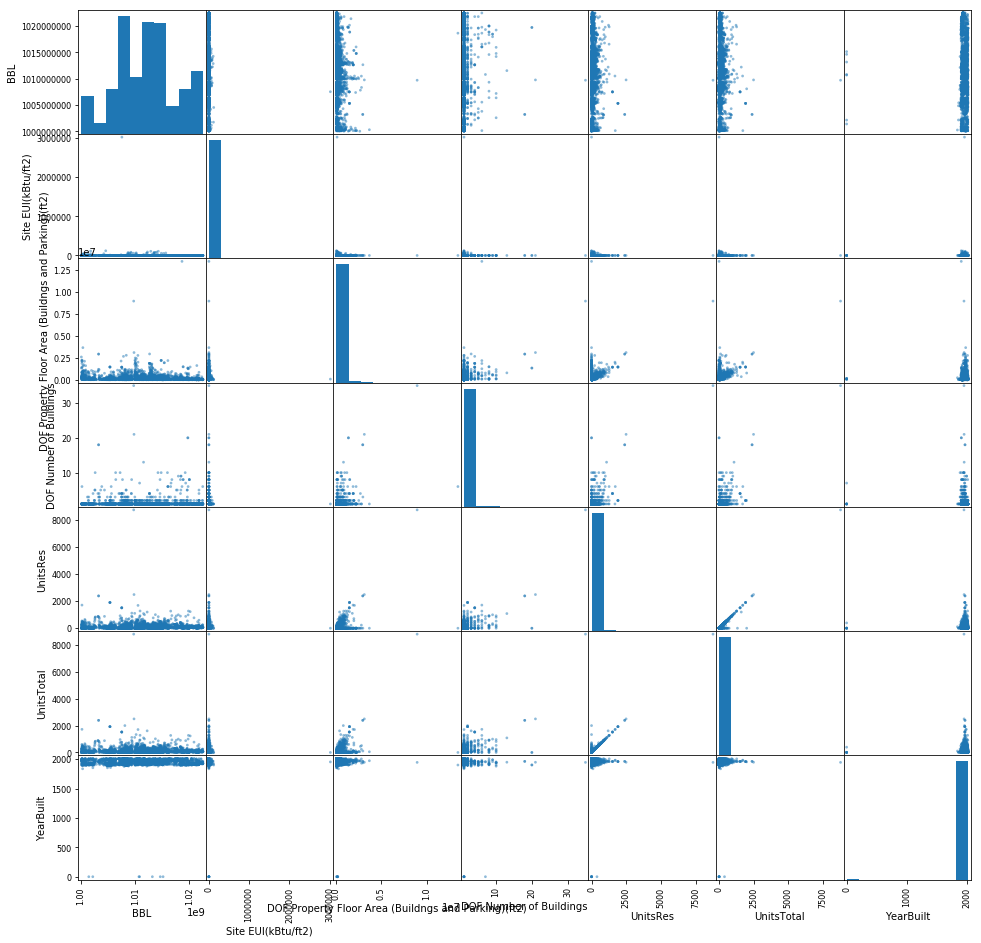

In [13]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16));

Figure 2: scatter matix of final dataset (please describe)

# 4. Data Visulization
__4.1 Original Data Plot__

__4.2 Log/ Log Plot__


once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building.  **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

**Make a  scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **


Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

## 4.1 Original Data Plot 
TO DO 4 集中在某一軸，改成log log plot
X : Energy()
Y : Units

In [24]:
bblnrgdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 462 to 5549
Data columns (total 9 columns):
BBL                                                    6 non-null float64
Site EUI(kBtu/ft2)                                     6 non-null float64
Source EUI(kBtu/ft2)                                   6 non-null object
DOF Property Floor Area (Buildngs and Parking)(ft2)    6 non-null float64
DOF Number of Buildings                                6 non-null float64
UnitsRes                                               6 non-null int64
UnitsTotal                                             6 non-null int64
YearBuilt                                              6 non-null int64
Total Energy                                           6 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 640.0+ bytes


In [14]:
bblnrgdata_graph = bblnrgdata.copy()

In [15]:
bblnrgdata_graph["Total Energy"] = bblnrgdata_graph["Site EUI(kBtu/ft2)"]*bblnrgdata_graph["DOF Property Floor Area (Buildngs and Parking)(ft2)"] 

In [16]:
bblnrgdata_graph = bblnrgdata_graph[(bblnrgdata_graph["Total Energy"] < 3*1e11)&(bblnrgdata_graph["UnitsTotal"]<8000)]

In [17]:
#bblnrgdata_graph[(bblnrgdata_graph["Total Energy"] > 3)]

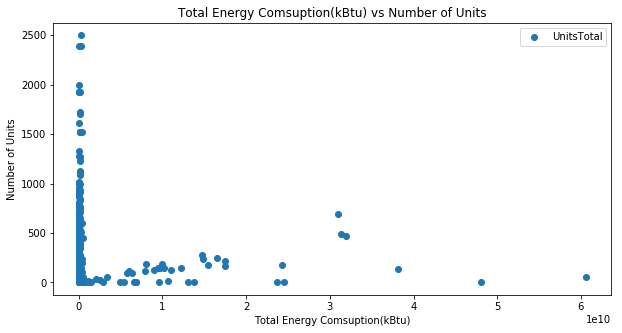

In [93]:
x = bblnrgdata_graph["Total Energy"]
y = bblnrgdata_graph["UnitsTotal"]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(x, y)
ax.set_xlabel("Total Energy Comsuption(kBtu)")
ax.set_ylabel("Number of Units")
ax.set_title("Total Energy Comsuption(kBtu) vs Number of Units")
ax.legend()

plt.show()

__Zoom__

add

ax.set_xlim=(1000,1e10)

ax.set_ylim=(1,1000)


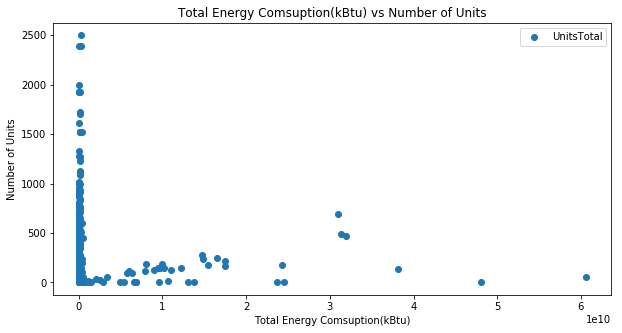

In [92]:
x = bblnrgdata_graph["Total Energy"]
y = bblnrgdata_graph["UnitsTotal"]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(x, y)
ax.set_xlabel("Total Energy Comsuption(kBtu)")
ax.set_ylabel("Number of Units")
ax.set_title("Total Energy Comsuption(kBtu) vs Number of Units")
ax.legend()
ax.set_xlim=(1000,1e10)
ax.set_ylim=(1,1000)
plt.show()

** IMPORTANT NOTE ABOUT LOGS AND LOG PLOTS **
in class we talked about logs when we talked about likelihood: often we prefer working with the log(likelihood) instead of the likelihood, and since all problems involving likelihood are about maximization (find the maximum likelihood to find the best fit parameters) and the log is a MONOTONIC function (log(x) grows when x grows, and gets smaller when x gets smaller) the maximum of the likelihood of a model with be in the same place as the maximum of the log(likelihood). 

Another great thing about logarithm: **when the points in a plot all look scrunched against the axis **


**Try to make a log plot instead**. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

This will compress the high  x and high  y values, and compress the small x and small y values. 



NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

Also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.



## 4.2 Log/Log Plot 
TO DO 5 被畫成log log plot好看～

In [16]:
bblnrgdata.head(2)

,BBL,Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,UnitsRes,UnitsTotal,YearBuilt,Reported Property Floor Area (Building(s))
2,1.013110e+09,125.4,239.8,330000,313200.0,1.0,0,56,1977,330000.0
15,1.007660e+09,122.3,347,59468,53168.0,1.0,0,8,1912,59468.0


In [22]:
#you may need to change the name of this column under some versions of pandas
bblnrgdata['Reported Property Floor Area (Building(s))'] = \
            pd.to_numeric(bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'], 
                          errors='coerce').astype(float)

In [23]:
bblnrgdata.head(2)

,BBL,Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,UnitsRes,UnitsTotal,YearBuilt,Reported Property Floor Area (Building(s))
2,1.013110e+09,125.4,239.8,330000,313200.0,1.0,0,56,1977,330000.0
15,1.007660e+09,122.3,347,59468,53168.0,1.0,0,8,1912,59468.0


In [24]:
#the line below checks that the conversion worked. should be removed in delivery ready ipynb
#bblnrgdata['Reported Property Floor Area (Building(s))'].astype(float)#log plot

In [25]:
bblnrgdata['nrg'] = bblnrgdata['Reported Property Floor Area (Building(s))']*bblnrgdata["Site EUI(kBtu/ft2)"]

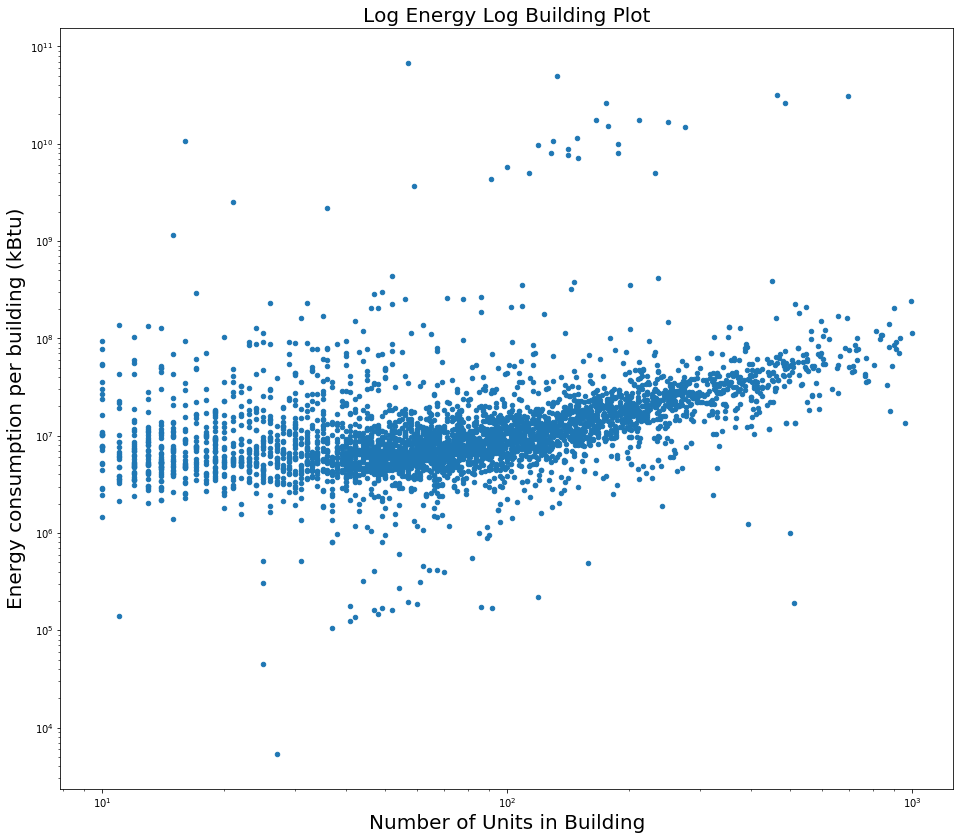

In [114]:
bblnrgdataCut = bblnrgdata[(bblnrgdata.nrg > 1000) & (bblnrgdata.UnitsTotal>=10) & 
                           (bblnrgdata.UnitsTotal<1000)]
bblnrgdata = bblnrgdataCut
ax = bblnrgdataCut.plot(kind='scatter', y='nrg', x='UnitsTotal', 
                   marker='o',  figsize=(16, 14), loglog=True)
#ax.legend()
ax.set_title("Log Energy Log Building Plot", fontsize=20)
yl = ax.set_xlabel("Number of Units in Building", fontsize=20)
xl = ax.set_ylabel("Energy consumption per building (kBtu)", fontsize=20)


# 5. Data Analysis & Model Testing

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

## BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:
if you used statsmodels it would look something like this:


In [115]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
bblnrgdata = bblnrgdata[(bblnrgdata['nrg'] > 0)&(bblnrgdata['UnitsTotal'] > 0)]

In [116]:
y = bblnrgdata['nrg']
x = bblnrgdata['UnitsTotal']

X = sm.add_constant(np.log10(x))
linmodel = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN

In [117]:
bblnrgdata["log_UnitsTotal"] = np.log10(bblnrgdata['UnitsTotal'])
bblnrgdata["log_nrg"] = np.log10(bblnrgdata['nrg'])

## choose  which is your DEPENDENT and which is your INDEPENDENT variable. 


## 5.1 OLS  
TO DO 6 檢驗




1. **Fit a line** to Units vs Energy. The independent variable in this problem should be number of units, but try fit both Unity to energy and energy to unit.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**.  Can you compare these models with the likelihood ratio test? (hint: are they nested??) I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2 + bx + c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



In [118]:
bblnrgdata.head(3)

,BBL,Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,UnitsRes,UnitsTotal,YearBuilt,Reported Property Floor Area (Building(s)),nrg,log_UnitsTotal,log_nrg,log_UnitsTotal_2,UnitsTotal_2,errorsnrg,errorsunits
2,1.013110e+09,125.4,239.8,330000,313200.0,1.0,0,56,1977,330000.0,41382000.0,1.748188,7.616811,3.056161,3136,0.003463,0.058035
16,1.008150e+09,117.0,257,364000,364000.0,1.0,0,24,1954,364000.0,42588000.0,1.380211,7.629287,1.904983,576,0.003712,0.088650
18,1.005050e+09,82.1,201.3,235370,214110.0,1.0,0,24,1926,235370.0,19323877.0,1.380211,7.286094,1.904983,576,0.005290,0.088650


### Figure 3.  log_UnitsTotal(x) vs log_nrg(y)

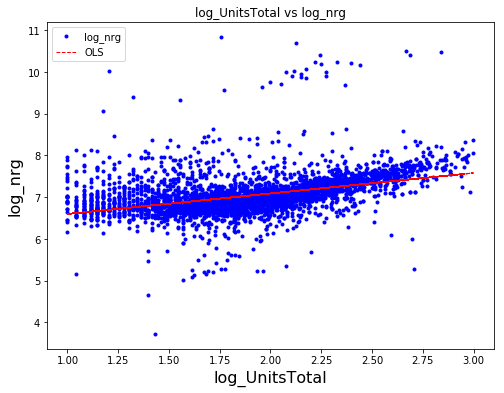

In [119]:
lm = smf.ols(formula = "log_nrg ~ log_UnitsTotal", data = bblnrgdata).fit()
y_fit = lm.predict(bblnrgdata)   # Calculate the predicted value

plt.figure(figsize = (8,6))
plt.plot(bblnrgdata["log_UnitsTotal"], bblnrgdata["log_nrg"],'ob', markersize = 3) # Plot the observed value, linestyle = 'or', red dots
plt.plot(bblnrgdata["log_UnitsTotal"],y_fit,'--r', linewidth = 1,label = "OLS")                 # Plot the predicted value, blue dashed line

# Plot setting
plt.title("log_UnitsTotal vs log_nrg")
plt.xlabel('log_UnitsTotal', fontsize = 16)
plt.ylabel('log_nrg', fontsize = 16)
plt.legend()

In [120]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_nrg   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     800.6
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.13e-160
Time:                        21:53:43   Log-Likelihood:                -2324.2
No. Observations:                3992   AIC:                             4652.
Df Residuals:                    3990   BIC:                             4665.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.1076      0.034    182.100      0.000       6.042       6.173
log_UnitsTotal     0.4908      0.017     28.295      0.000       0.457       0.525
==============================================================================
Omnibus:                     2192.819   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48020.607
Skew:                           2.155   Prob(JB):                         0.00
Kurtosis:                      19.436   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Figure 4.  log_nrg(x) vs log_UnitsTotal(y)

In [121]:
lm_1 = smf.ols(formula = "log_UnitsTotal ~ log_nrg", data = bblnrgdata).fit()
y_fit_1 = lm_1.predict(bblnrgdata)   # Calculate the predicted value

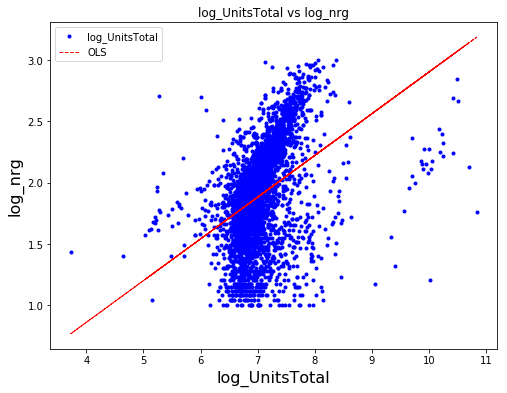

In [122]:
plt.figure(figsize = (8,6))
plt.plot(bblnrgdata["log_nrg"], bblnrgdata["log_UnitsTotal"] ,'ob', markersize = 3) # Plot the observed value, linestyle = 'or', red dots
plt.plot(bblnrgdata["log_nrg"],y_fit_1,'--r', linewidth = 1,label = "OLS")                 # Plot the predicted value, blue dashed line

# Plot setting
plt.title("log_UnitsTotal vs log_nrg")
plt.xlabel('log_UnitsTotal', fontsize = 16)
plt.ylabel('log_nrg', fontsize = 16)
plt.legend()

In [123]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_UnitsTotal   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     800.6
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.13e-160
Time:                        21:53:50   Log-Likelihood:                -1594.5
No. Observations:                3992   AIC:                             3193.
Df Residuals:                    3990   BIC:                             3206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5032      0.085     -5.929      0.000      -0.670      -0.337
log_nrg        0.3405      0.012     28.295      0.000       0.317       0.364
==============================================================================
Omnibus:                      153.836   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.715
Skew:                          -0.488   Prob(JB):                     5.16e-38
Kurtosis:                       3.280   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
bblnrgdata["log_UnitsTotal_2"] = bblnrgdata["log_UnitsTotal"] * bblnrgdata["log_UnitsTotal"]
bblnrgdata["UnitsTotal_2"] = bblnrgdata["UnitsTotal"] * bblnrgdata["UnitsTotal"]

In [129]:
curvemodel = smf.ols("log_nrg ~ log_UnitsTotal + log_UnitsTotal_2",data = bblnrgdata).fit()

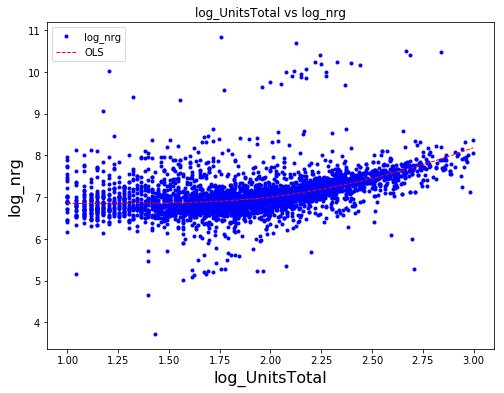

In [130]:
plt.figure(figsize = (8,6))
plt.plot(bblnrgdata["log_UnitsTotal"], bblnrgdata["log_nrg"] ,'ob', markersize = 3) # Plot the observed value, linestyle = 'or', red dots
plt.plot(sort(bblnrgdata["log_UnitsTotal"]), sort(curvemodel.predict()),'--r', linewidth = 1,label = "OLS")                 # Plot the predicted value, blue dashed line

# Plot setting
plt.title("log_UnitsTotal vs log_nrg")
plt.xlabel('log_UnitsTotal', fontsize = 16)
plt.ylabel('log_nrg', fontsize = 16)
plt.legend()

In [131]:
curvemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_nrg   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     603.4
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.12e-229
Time:                        21:54:57   Log-Likelihood:                -2161.6
No. Observations:                3992   AIC:                             4329.
Df Residuals:                    3989   BIC:                             4348.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.1337      0.115     70.892      0.000       7.909       8.359
log_UnitsTotal      -1.7302      0.122    -14.198      0.000      -1.969      -1.491
log_UnitsTotal_2     0.5824      0.032     18.399      0.000       0.520       0.645
==============================================================================
Omnibus:                     2363.734   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65676.793
Skew:                           2.316   Prob(JB):                         0.00
Kurtosis:                      22.323   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Null Hypothesis : simple linear regression is the same as poly regression

In [135]:
print ("LR : ", -2 * (-lm.llf - (-curvemodel.llf)))

LR :  -325.157988067


In [134]:
print ("LR from statsmodels:", lm.compare_lr_test(curvemodel))

LR from statsmodels: (-325.15798806713883, nan, -1.0)


In [136]:
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

In [137]:
## Assume that there is error in the reported energy. 
## but that is the product of two measured qusntities, each of which will have errors. 
## The minimum error is the squareroot of the value

#Below I am writing out some uncertainties - please explain the functional form that I used.
#errors on the measured quantities
#print(len(bblnrgdata['Reported Property Floor Area (Building(s))']))
errorsnrg = np.sqrt((bblnrgdata['Reported Property Floor Area (Building(s))'])**2 +\
                (bblnrgdata['Site EUI(kBtu/ft2)']**2))
#print(len(errorsnrg))
## Assume count statistics in the number of units as well
errorsunits = np.sqrt(bblnrgdata.UnitsTotal)

#These errors need to be propagated properly through the log

In [138]:
errorsInLogNrg = np.abs(errorsnrg / bblnrgdata.nrg / np.log(10))
errorsInLogUnits = np.abs(errorsunits / bblnrgdata.UnitsTotal / np.log(10))
#print(len(errorsInLogNrg))
bblnrgdata['errorsnrg'] = errorsInLogNrg
bblnrgdata['errorsunits'] = errorsInLogUnits


In [139]:
data = np.log10(bblnrgdata["nrg"])
model = lm.predict()

print ("Chi2_1",chi2(data, model, bblnrgdata.errorsnrg))
#print(len(data),len(model),len(bblnrgdata.errorsnrg))

data_1 = np.log10(bblnrgdata["UnitsTotal"])
model_1 = lm_1.predict()
print ("Chi2_2",chi2(data_1, model_1, bblnrgdata.errorsunits))


Chi2_1 3.42937530768e+12
Chi2_2 444696.302705


## Null hypothesis rejected

## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

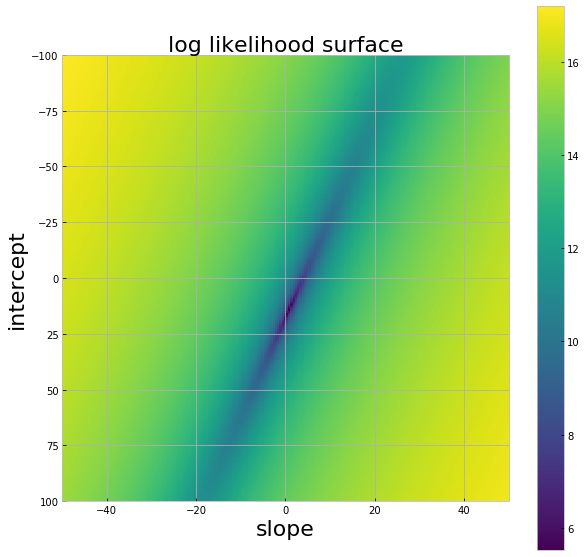

In [42]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0.5,0,'total energy consumption (kBtu)')

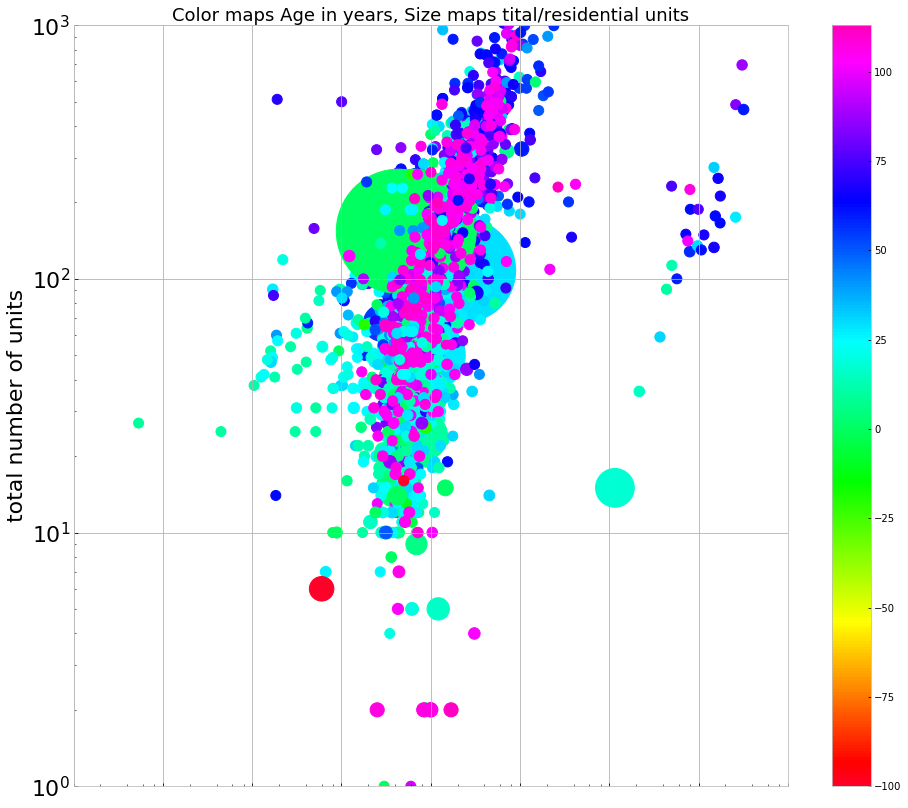

In [49]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)